<a href="https://colab.research.google.com/github/Amarelfaith/ptc/blob/master/Od.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [106]:
yolo = cv2.dnn.readNet("./yolov3-tiny.weights", "./yolov3-tiny.cfg")

In [107]:
classes = []
with open("./coco.names",'r') as f:
  classes = f.read().splitlines()

In [108]:
len(classes)

80

In [125]:
img = cv2.VideoCapture(0)
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB=True, crop=False)

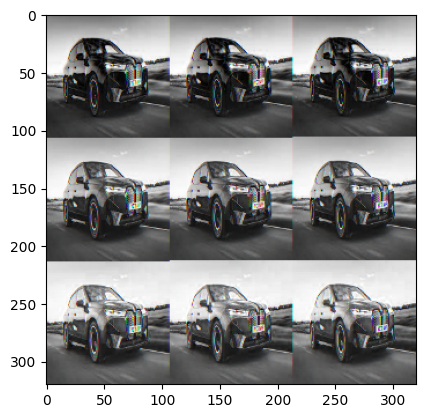

In [126]:
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [112]:
yolo.setInput(blob)

In [113]:
output_layes_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layes_name)

In [114]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0] * width)
      center_x = int(detection[0] * height)
      w = int(detection[0] * width)
      h = int(detection[0] * height)
      x = int(center_x - w/2)
      y = int(center_y - h/2)

      boxes.append([x,y,w,h])
      confidence.append(float(confidence))
      class_ids.append(class_id)


In [115]:
len(boxes)

0

In [116]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [117]:
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
colors = np.random.uniform(0,255, size = (len(boxes),3))

In [118]:

if len(indexes) > 0:
  for i in indexes.flatten():
    x,y,w,h = boxes[i]

    label = str(classes[class_ids[i]])
    confi = str(round(confidence[i], 2))
    color = colors[i]

    cv2.reactangle(img, (x,y),(x+w,y+h), color, 3)
    cv2.putText(img, label + " " + confi, (x,y+20), font,2,(255,255,255),3)

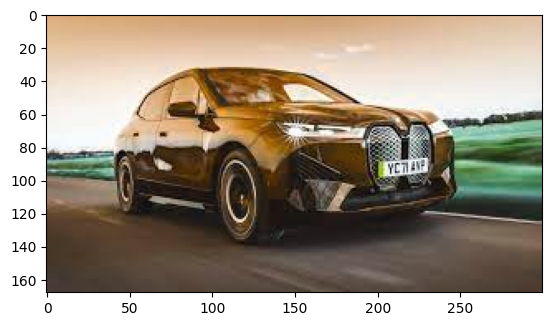

In [119]:
plt.imshow(img)